# Midterm EDA Project

### Purpose/Question to Answer:

How has the trend of the true 3 outcomes in baseball (walk BB, strikeouts K, and homeruns HR) changed in the past 10 years?

*Note 2020 is being skipped over in this data because 2020 was a shortened season and started 3 months late with various rule changes so for the purposes of this EDA it will not be included.

### Background:

In the past two decades there has been a revolution in baseball. There was a heavy shift away from contact hitters to homerun hitters. As a result, there is a general notion that the game has become too dependent on the three true outcomes (a walk, strikeout, or homerun). I wanted to analyze each team's overall three true outcome stats for the last 10 years (2010 to 2021 excluding 2020) to determine if such a shift exists.

### Data Set Selection:

This data set was chosen from Kaggle. All of the data was most likely gathered from Baseball Reference which is the most accurate baseball statistics database available to the public.

### Data Prep/Cleaning:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
team2010 = pd.read_csv('batting_2010.csv')
team2011 = pd.read_csv('batting_2011.csv')
team2012 = pd.read_csv('batting_2012.csv')
team2013 = pd.read_csv('batting_2013.csv')
team2014 = pd.read_csv('batting_2014.csv')
team2015 = pd.read_csv('batting_2015.csv')
team2016 = pd.read_csv('batting_2016.csv')
team2017 = pd.read_csv('batting_2017.csv')
team2018 = pd.read_csv('batting_2018.csv')
team2019 = pd.read_csv('batting_2019.csv')
team2021 = pd.read_csv('batting_2021.csv')

teamTotal = [team2010, team2011, team2012, team2013, team2014, team2015, team2016, team2017, team2018, team2019, team2021]

# each team's season stats came in a separate csv file so this is to merge them all as they all contain the same columns.
# this is so every year is in the same dataframe and makes year to year analysis a little easier

decade = pd.concat(teamTotal)

## all offensive stats

decade

,Season,Team,G,PA,AB,R,H,AVG,OBP,SLG,...,2B,3B,HR,BB,SO,SB,CS,wOBA,wRC+,WAR
0,2010,NYY,2313,6379,5567,859,1485,0.267,0.350,0.436,...,275,32,201,662,1136,103,30,0.346,112,31.2
1,2010,BOS,2327,6356,5646,818,1511,0.268,0.339,0.451,...,358,22,211,587,1140,68,17,0.345,109,24.9
2,2010,CIN,2370,6285,5579,790,1515,0.272,0.338,0.436,...,293,30,188,522,1218,93,43,0.340,106,35.7
3,2010,MIN,2290,6257,5568,781,1521,0.273,0.341,0.422,...,318,41,142,559,967,68,28,0.335,106,27.8
4,2010,MIL,2262,6304,5606,750,1471,0.262,0.335,0.424,...,293,33,182,546,1216,81,26,0.334,104,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2021,ARI,2449,6144,5489,679,1297,0.236,0.309,0.382,...,308,31,144,537,1465,43,16,0.301,84,11.0
26,2021,SEA,2360,6010,5355,697,1209,0.226,0.303,0.385,...,233,11,199,535,1492,64,24,0.300,93,11.5
27,2021,PIT,2393,5983,5336,609,1261,0.236,0.309,0.364,...,240,35,124,529,1328,60,30,0.294,83,9.1
28,2021,MIA,2436,5928,5348,623,1244,0.233,0.298,0.372,...,226,23,158,450,1553,106,29,0.291,84,11.5


In [24]:
#Checking first 5 rows of merged data
decade.head()

,Season,Team,G,PA,AB,R,H,AVG,OBP,SLG,...,2B,3B,HR,BB,SO,SB,CS,wOBA,wRC+,WAR
0,2010,NYY,2313,6379,5567,859,1485,0.267,0.350,0.436,...,275,32,201,662,1136,103,30,0.346,112,31.2
1,2010,BOS,2327,6356,5646,818,1511,0.268,0.339,0.451,...,358,22,211,587,1140,68,17,0.345,109,24.9
2,2010,CIN,2370,6285,5579,790,1515,0.272,0.338,0.436,...,293,30,188,522,1218,93,43,0.340,106,35.7
3,2010,MIN,2290,6257,5568,781,1521,0.273,0.341,0.422,...,318,41,142,559,967,68,28,0.335,106,27.8
4,2010,MIL,2262,6304,5606,750,1471,0.262,0.335,0.424,...,293,33,182,546,1216,81,26,0.334,104,30.0


In [21]:
## Checking shape of the data frame
decade.shape

(330, 23)

In [37]:
## Checking for null values
decade.isnull().values.any()

False

In [25]:
## Looking at all the columns and seeing what may or may not be needed
decade.columns

Index(['Season', 'Team', 'G', 'PA', 'AB', 'R', 'H', 'AVG', 'OBP', 'SLG', 'OPS',
       'ISO', '1B', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'wOBA', 'wRC+',
       'WAR'],
      dtype='object')

In [35]:
## Check data types of all data
decade.dtypes

Season      int64
Team       object
G           int64
PA          int64
AB          int64
R           int64
H           int64
AVG       float64
OBP       float64
SLG       float64
OPS       float64
ISO       float64
1B          int64
2B          int64
3B          int64
HR          int64
BB          int64
SO          int64
SB          int64
CS          int64
wOBA      float64
wRC+        int64
WAR       float64
dtype: object

In [68]:
## given that I am trying to analyze the three true outcomes I do not need 1b, 2b, 3b columns.
## only concerend with walks (BB), strikeouts (SO), and home runs (HR) for now, but others may come in handy
decade1 = decade.drop(['1B', '2B', '3B', 'G', 'PA', 'AB', 'SB', 'CS'], axis = 1)
decade1['Team'] = decade1['Team'].replace(['FLA'],'MIA')

In [69]:
decade1.head()

,Season,Team,R,H,AVG,OBP,SLG,OPS,ISO,HR,BB,SO,wOBA,wRC+,WAR
0,2010,NYY,859,1485,0.267,0.350,0.436,0.786,0.169,201,662,1136,0.346,112,31.2
1,2010,BOS,818,1511,0.268,0.339,0.451,0.790,0.183,211,587,1140,0.345,109,24.9
2,2010,CIN,790,1515,0.272,0.338,0.436,0.774,0.164,188,522,1218,0.340,106,35.7
3,2010,MIN,781,1521,0.273,0.341,0.422,0.762,0.148,142,559,967,0.335,106,27.8
4,2010,MIL,750,1471,0.262,0.335,0.424,0.759,0.161,182,546,1216,0.334,104,30.0


In [70]:
decade1.describe()

,Season,R,H,AVG,OBP,SLG,OPS,ISO,HR,BB,SO,wOBA,wRC+,WAR
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,2015.090909,712.815152,1393.060606,0.252676,0.319597,0.408309,0.727864,0.155618,175.378788,504.636364,1279.024242,0.315973,96.427273,18.998485
std,3.320413,77.015526,76.658378,0.011115,0.012154,0.026840,0.036616,0.022157,40.515360,62.701938,142.993079,0.013555,8.647918,7.908160
min,2010.000000,513.000000,1199.000000,0.226000,0.292000,0.335000,0.627000,0.104000,91.000000,375.000000,905.000000,0.279000,74.000000,-2.100000
25%,2012.000000,654.250000,1338.250000,0.244000,0.311000,0.390000,0.702000,0.140000,147.250000,459.250000,1183.250000,0.307000,90.000000,12.850000
50%,2015.000000,712.000000,1384.000000,0.252000,0.319500,0.407000,0.728000,0.154000,172.000000,503.000000,1280.500000,0.315000,96.000000,18.650000
75%,2018.000000,760.500000,1444.750000,0.260000,0.328000,0.426000,0.752000,0.170750,205.000000,549.750000,1384.000000,0.325000,101.000000,24.575000
max,2021.000000,943.000000,1625.000000,0.283000,0.352000,0.495000,0.848000,0.224000,307.000000,672.000000,1596.000000,0.355000,124.000000,39.900000


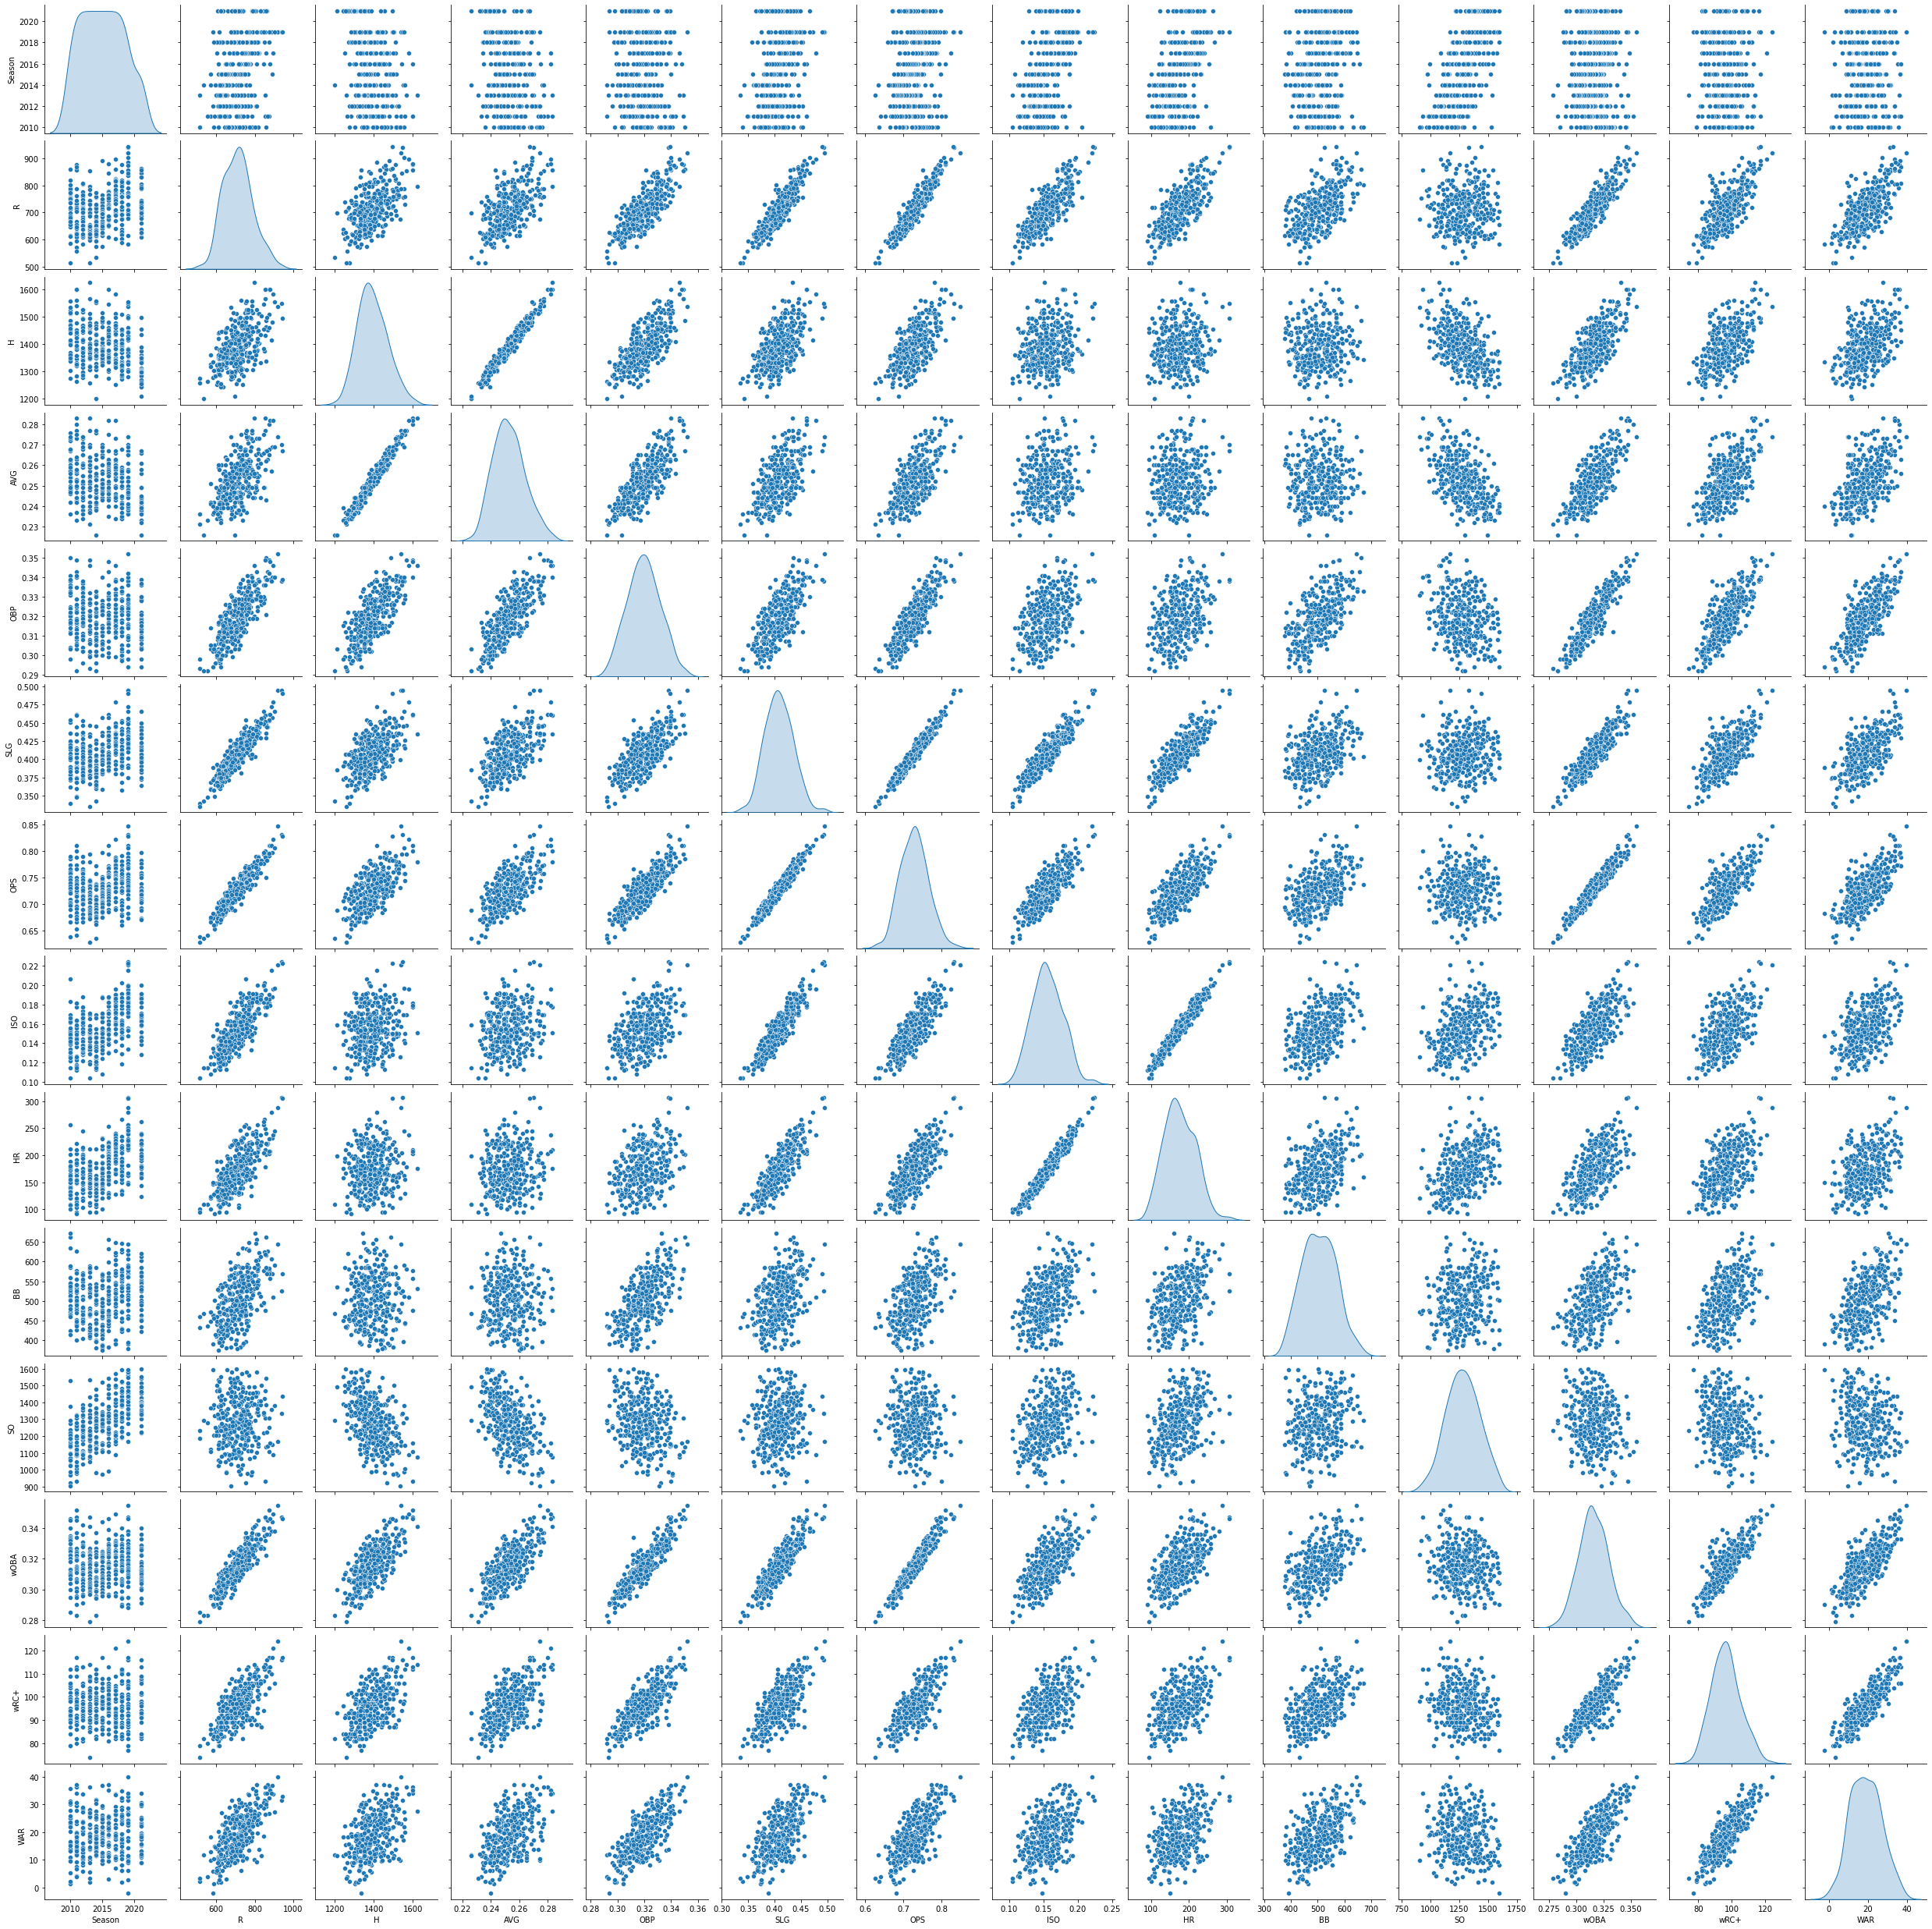

In [71]:
sns.pairplot(decade1, diag_kind="kde")

In [110]:
## Aggregated Data to separate by Season. Added "Season" column for graph.
outcomes = decade1.groupby('Season').agg({'BB':'sum', 'SO':'sum', 'HR':'sum'})
outcomes

,BB,SO,HR
Season,,,
2010,15778,34306,4613
2011,15018,34488,4552
2012,14709,36426,4934
2013,14640,36710,4661
2014,14020,37441,4186
2015,14073,37446,4909
2016,15088,38982,5610
2017,15829,40104,6105
2018,15686,41207,5585


In [91]:
outcomes.dtypes

Season    int64
BB        int64
SO        int64
HR        int64
dtype: object

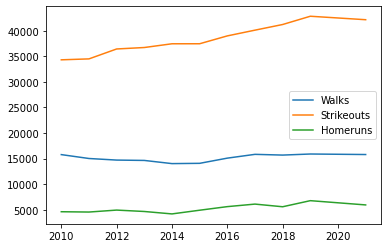

In [93]:
# create data
x = outcomes.Season
y = outcomes.BB
y1 = outcomes.SO
y2 = outcomes.HR
  
# plot lines
plt.plot(x, y, label = "Walks")
plt.plot(x, y1, label = "Strikeouts")
plt.plot(x, y2, label = "Homeruns")
plt.legend()
plt.show()

Not great due to the scale of the y-axis. Makes it tough to see overall changes as for all three the numbers vary by the hundred and the scale is in five thousands. Lets try separate plots

## Plot of Walks (Sum) from 2010-2021

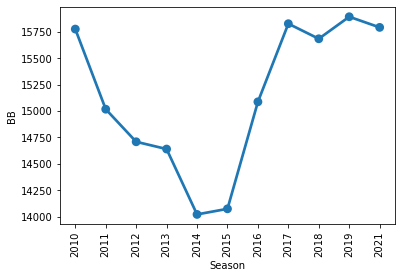

In [98]:
sns.pointplot(x='Season', y='BB', data=decade1, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Much better. This helps show that walks interestingly enough declined from 2010-2015, but have since returned to 2010 numbers. I wonder why this occurs. Pre 2010 baseball there was a large focus on OBP and getting on base. Curious to see if the other two outcomes follow the same trend.

## Plot of Strikeouts (Sum) from 2010-2021

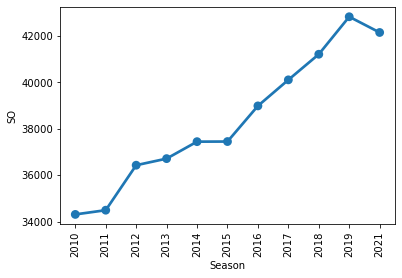

In [94]:
sns.pointplot(x='Season', y='SO', data=decade1, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

So this plot shows that strikeouts have been steadily increasing since 2010, peaking in 2019, and decreasing for the latest 2021 season. Note: this does not follow the same trend as the walks did from 2010-2015, but does increase steadily from 2015 and on just like walks. This might explain the decline in walks as hitters were more inclined to swing for a chance to get more than just singles and just disregarding the increase in strikeouts.

## Plot of Homeruns (Sum) from 2010-2021

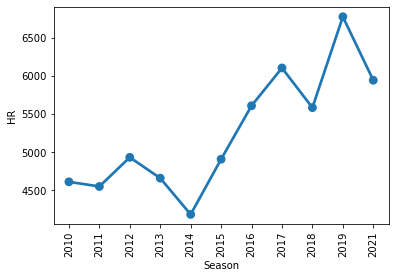

In [76]:
sns.pointplot(x='Season', y='HR', data=decade1, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Homeruns have similarities in terms of its trend with both walks and strikeouts. Like walks, there is a decline in homeruns between 2010 and 2014 and a similar increase from 2015 on. Interestingly, like strikeouts while overall have increased since 2010, there is a significant decline since 2019. The dip in homerun numbers in 2014 suggests that hitter during that season were swinging more/striking out more and walking less, but still not finding results in terms of homeruns. * in the future might be worth looking into stats that season and seeing if there was a rise in other hits like doubles or if offense was just down across the board that whole year.

Overall these plots show that the three true outcomes have been on the rise since 2015 and are overall higher than their 2010 numbers.

## Plot of Walks by Team per Season

Now I want to analyze each Team's three true outcome numbers each season starting with walks

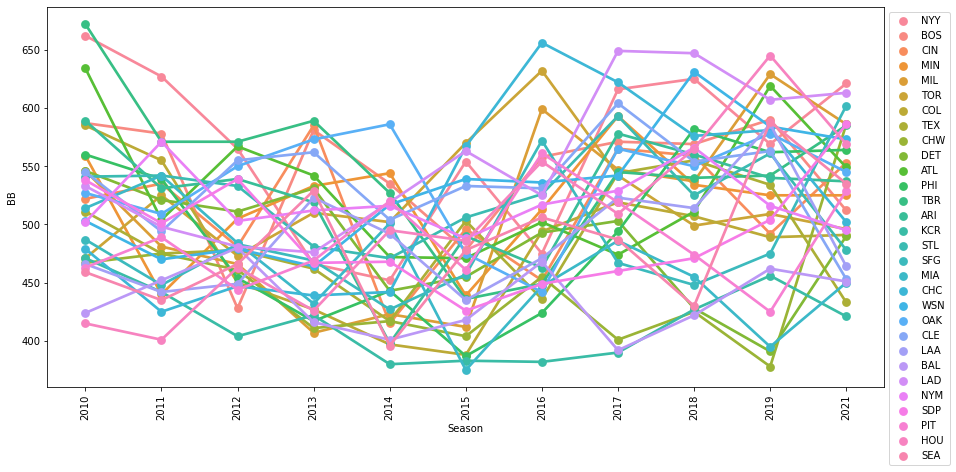

In [77]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='Season', y='BB', data=decade1, estimator=sum, ci=None, hue = 'Team')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

I was hoping this would be clear enough to see team trends, but it is too cluttered to get an accurate read

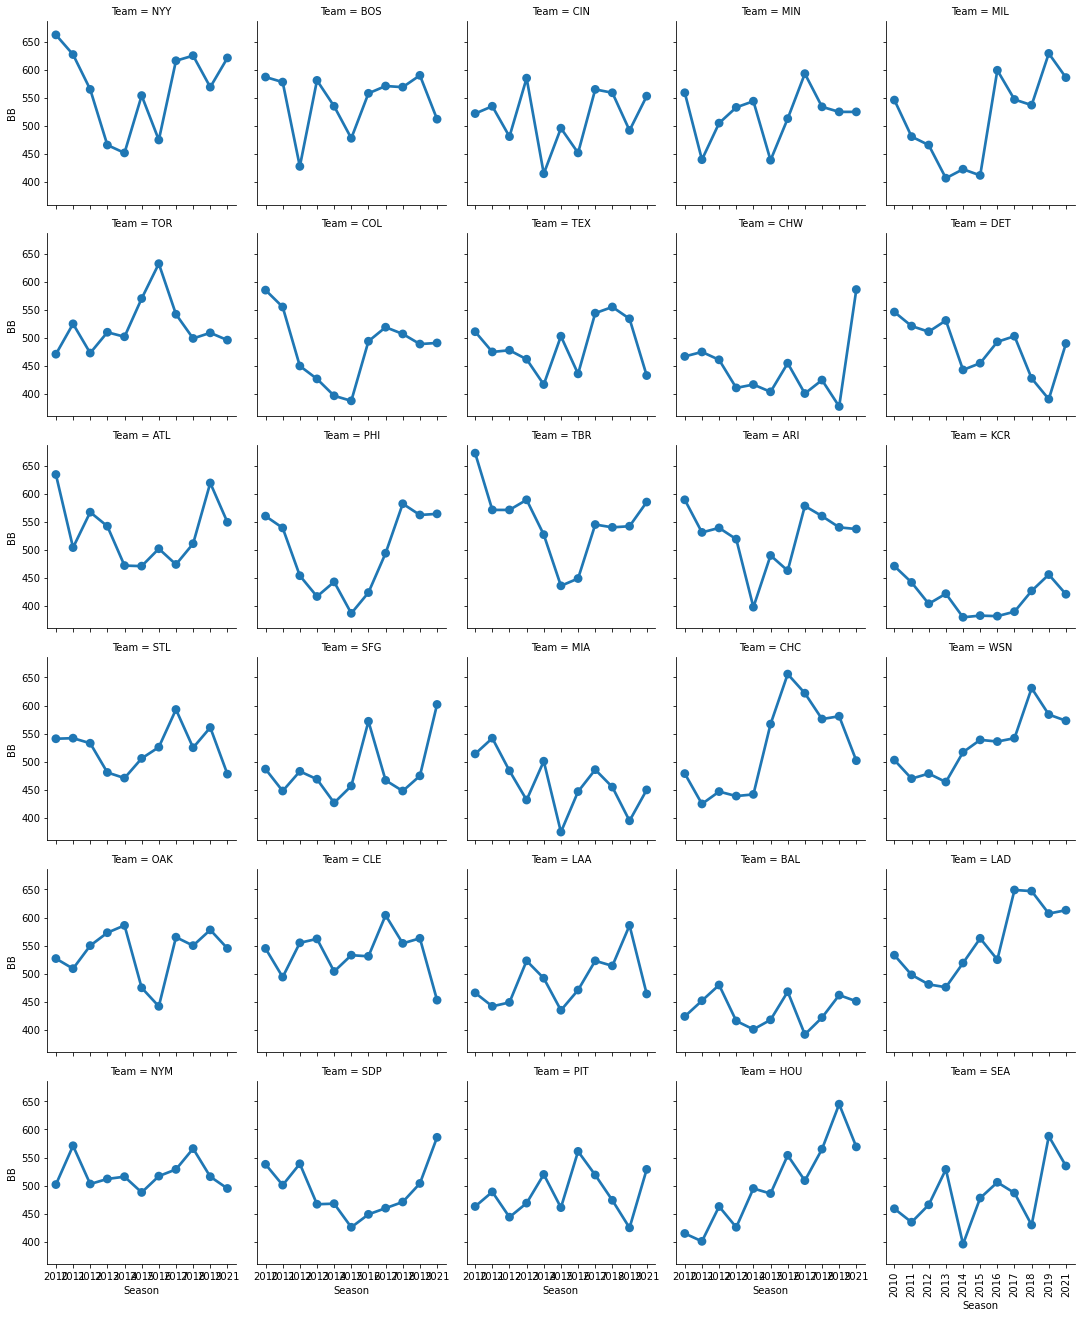

In [79]:
## Cat Plot for Walks per Season by Team
sns.catplot(x='Season', y='BB', data=decade1,
                estimator=sum, col='Team', kind="point",
                height=3,col_wrap = 5)
plt.xticks(rotation=90)
plt.show()

This is much better. It shows the trends of each team in terms of number of walks per season. Now I want to do the same plots, but with strikeouts and homeruns.

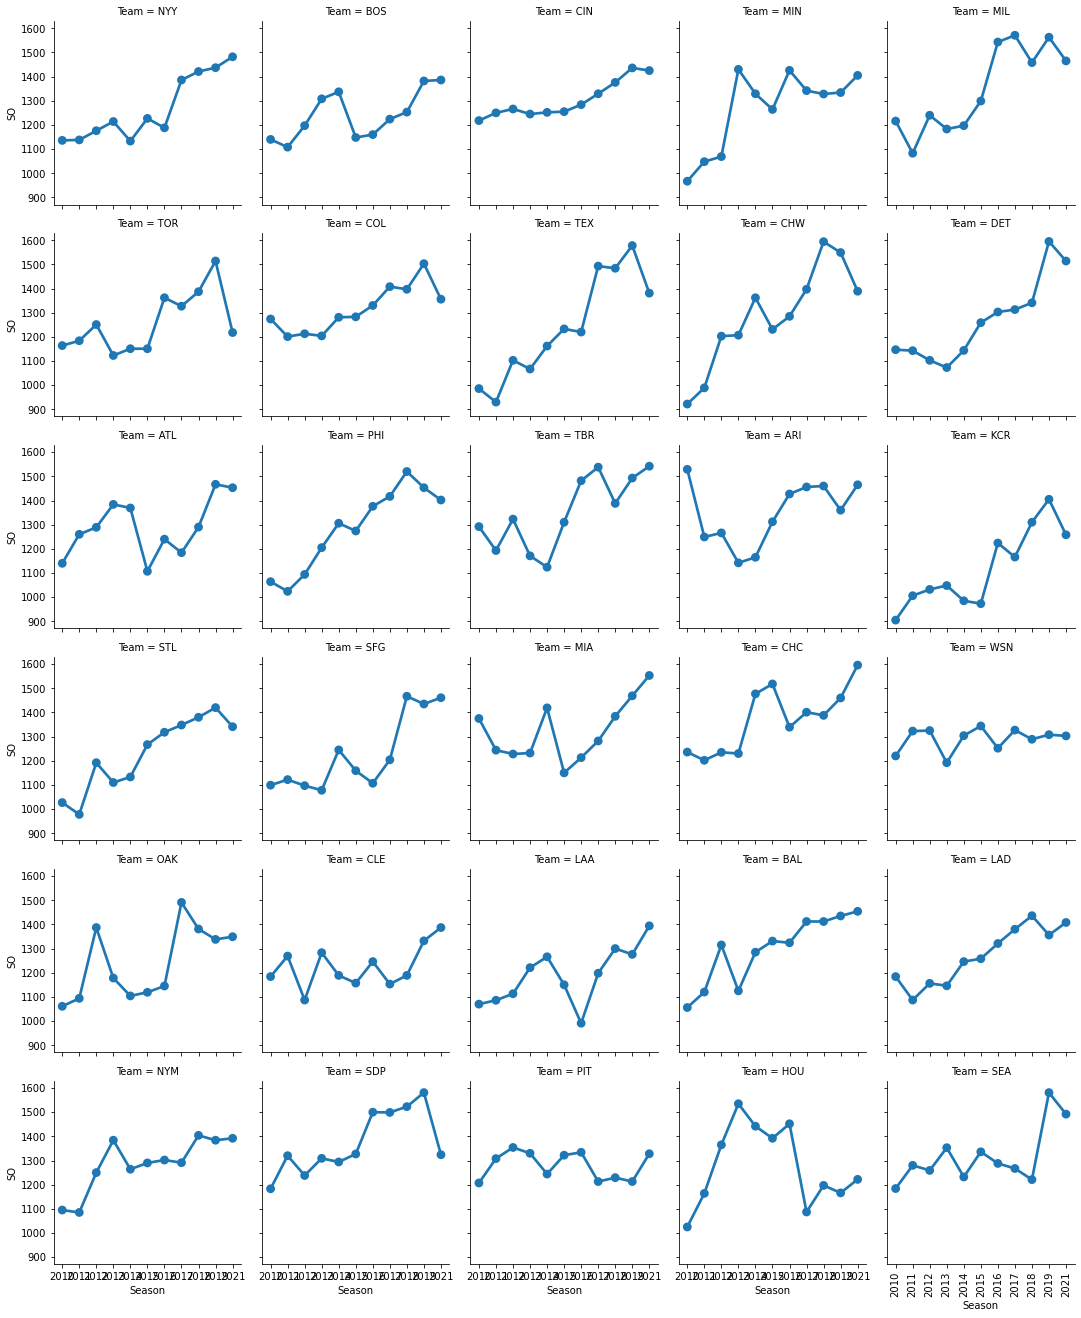

In [80]:
## Cat Plot for strikeouts per Season by Team
sns.catplot(x='Season', y='SO', data=decade1,
                estimator=sum, col='Team', kind="point",
                height=3,col_wrap = 5)
plt.xticks(rotation=90)
plt.show()

This is very insightful. It shows that overall most teams have trended upwards (showing a positive correlation) over the years in terms of total strikeouts per season. This is interesting because it shows that regardless of how successful the team is, the number of strkeouts have overall gone up since 2010 which seems counterintuitive as strikeouts are a negative outcome in the game.

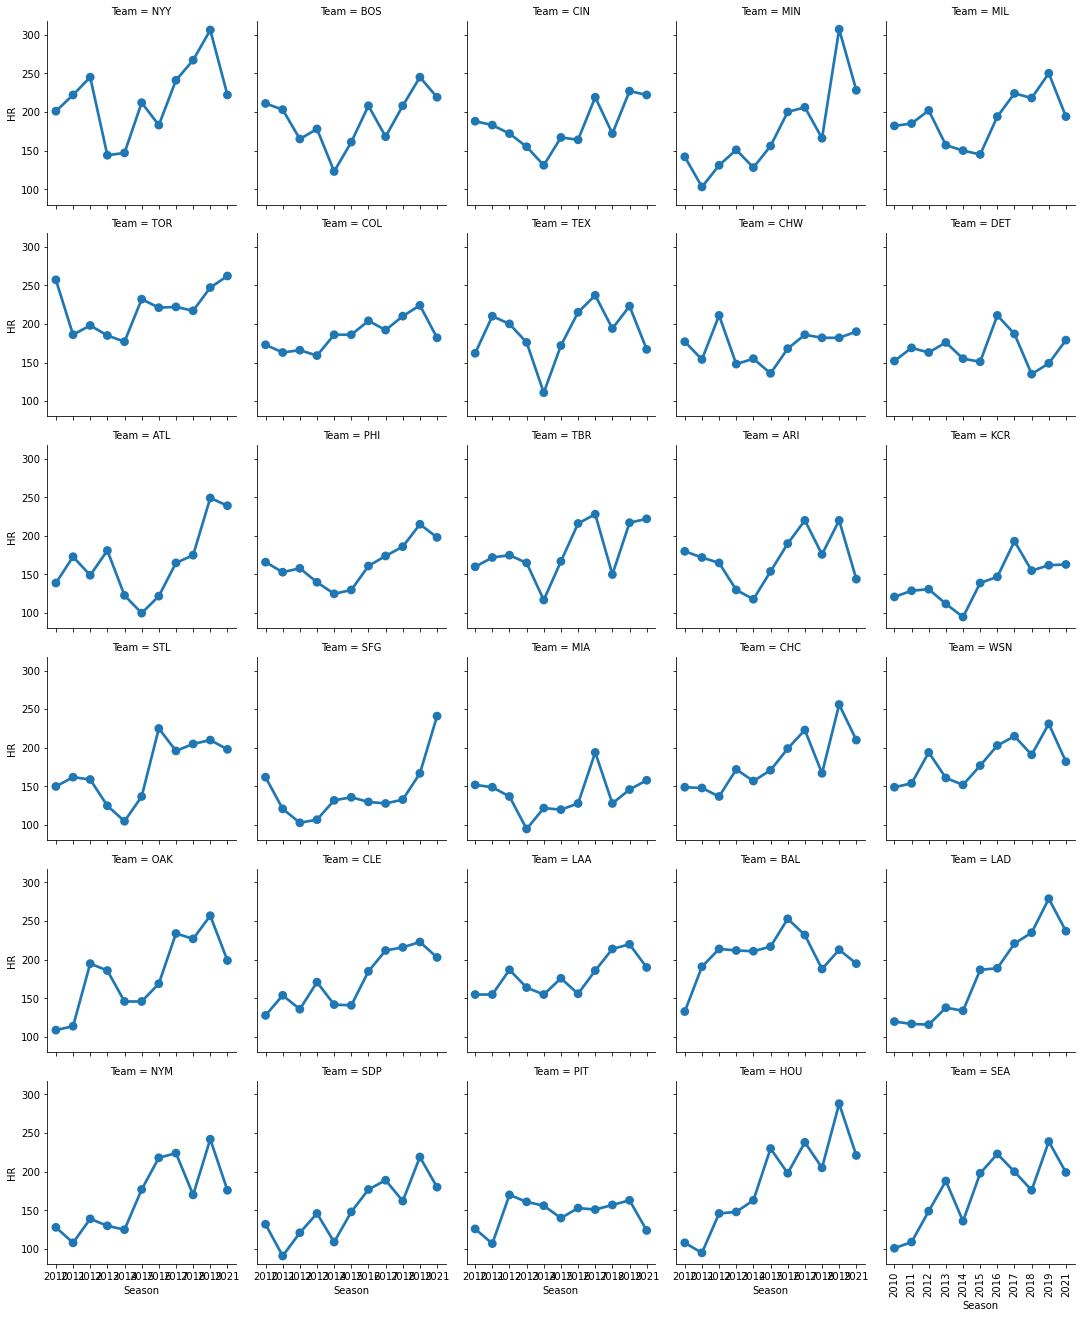

In [81]:
## Cat Plot for Homeruns per Season by Team
sns.catplot(x='Season', y='HR', data=decade1,
                estimator=sum, col='Team', kind="point",
                height=3,col_wrap = 5)
plt.xticks(rotation=90)
plt.show()

Another really interesting trend here. Overall the numbers of homeruns have increased for nearly every team since 2010. However, the intriguing aspect of these graphs is that nearly every team has had a drop in homeruns since 2019. This is fun to note because there have been reports of MLB changing the properties of the baseball between seasons (seam height, material, etc..) which affect how far balls travel when hit. The data here seems to lend evidence to support the claim that MLB changed the balls to decrease offensive numbers.

<AxesSubplot:xlabel='Season', ylabel='BB'>

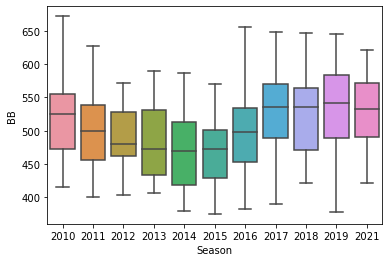

In [82]:
## Box plot for Walks per Season
sns.boxplot(x='Season', y='BB', data = decade1, showfliers=False)

Box plot of walks per season. This is just another way to represent the data that may be easier to view. The variety of ranges is interesting though as some years like 2016 and 2019 have massive ranges and some like 2012 have very compact plots.

<AxesSubplot:xlabel='Season', ylabel='SO'>

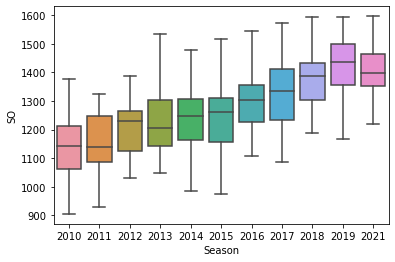

In [83]:
## Box plot for Strikeouts per Season
sns.boxplot(x='Season', y='SO', data = decade1, showfliers=False)

Box plot for strikeouts per season. Interesting to see the trends of the plots like how max strikeouts seems to have plateaued recently, but the quartiles still vary. Again, also interesting to see the varying ranges as well.

<AxesSubplot:xlabel='Season', ylabel='HR'>

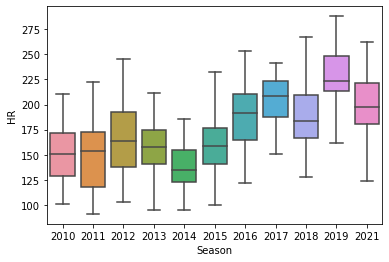

In [84]:
## Box plot for Homeruns per Season
sns.boxplot(x='Season', y='HR', data = decade1, showfliers=False)

This plot has the most variety in trend. Overall though, homerun numbers have steadily increased since 2015 and overall is the highest ever since 2010.

## END ANALYSIS

The three true outcomes have trended upward since 2010 pretty significantly overall.

Questions to ask about Midterm


1. if the data set has to have 6 features do they all need to be analyzed or can we focus on a couple?
1. Graphs. Should they start at 0? How would I do that with the seaborn sns plots?
2. Do pairplots count at 1 graph for the rubric?